## Dependencies

```
91a868ae3dedca688f6feea196235cc319aa621f  ../data/xianzai_phones_loglik.csv   # etc/60.18
c4b1bc5bc1dbaa94ca37b56d94f9807a2447412e  ../data/xianzai_feats.csv
```

In [1]:
phones_df_path = "../data/xianzai_phones_loglik.csv"
feats_df_path = "../data/xianzai_feats.csv"
!sha1sum $phones_df_path $feats_df_path

91a868ae3dedca688f6feea196235cc319aa621f  ../data/xianzai_phones_loglik.csv
c4b1bc5bc1dbaa94ca37b56d94f9807a2447412e  ../data/xianzai_feats.csv


## Load Data

In [2]:
import pandas as pd
WORD = "現在"
phones_df = pd.read_csv(phones_df_path)
feats_df = pd.read_csv(feats_df_path)

In [3]:
phones_df.head()

,utt_id,t,phone,ml_phone,sil,spn,a,aj,aw,o,...,ts,tsʰ,ɕ,z,z̩,s,ŋ,ŋ̍,ɻ,ʔ
0,LJH_GY_1479,0,ɕ,tɕʰ,-10.954497,-10.347873,-20.127528,-20.312442,-22.980598,-14.156406,...,-3.638061,-1.631068,-4.957225,-12.812556,-10.866649,-3.369929,-20.649436,-20.649436,-21.597041,-13.621322
1,LJH_GY_1479,1,ɕ,ɕ,-7.828703,-7.426585,-18.372492,-18.293093,-20.348971,-13.979235,...,-3.131583,-2.294741,-1.097899,-14.846644,-12.900733,-1.888304,-19.413104,-19.413104,-21.890116,-15.696814
2,LJH_GY_1479,2,ɕ,tsʰ,-8.536843,-7.032880,-14.579942,-16.695527,-20.671403,-11.590943,...,-5.496541,-0.227296,-5.465466,-11.980321,-10.034413,-7.002271,-18.788117,-18.788117,-22.118104,-18.082459
3,LJH_GY_1479,3,ɕ,tɕʰ,-8.859577,-6.646434,-19.724430,-18.367992,-24.129642,-15.280273,...,-6.059383,-4.051929,-7.072448,-16.135589,-14.189682,-9.297706,-24.051677,-24.051677,-23.327243,-22.819538
4,LJH_GY_1479,4,ɕ,ɕ,-12.557197,-10.119735,-21.076709,-27.767848,-30.382549,-23.913860,...,-5.917732,-7.738178,-0.738494,-19.257945,-17.312038,-8.567615,-27.597476,-27.597476,-23.382205,-21.637256


In [4]:
phone_table = phones_df.columns[4:].values
len(phone_table)

45

Text(0.5, 1.0, 'CZX_GY_5429 現在')

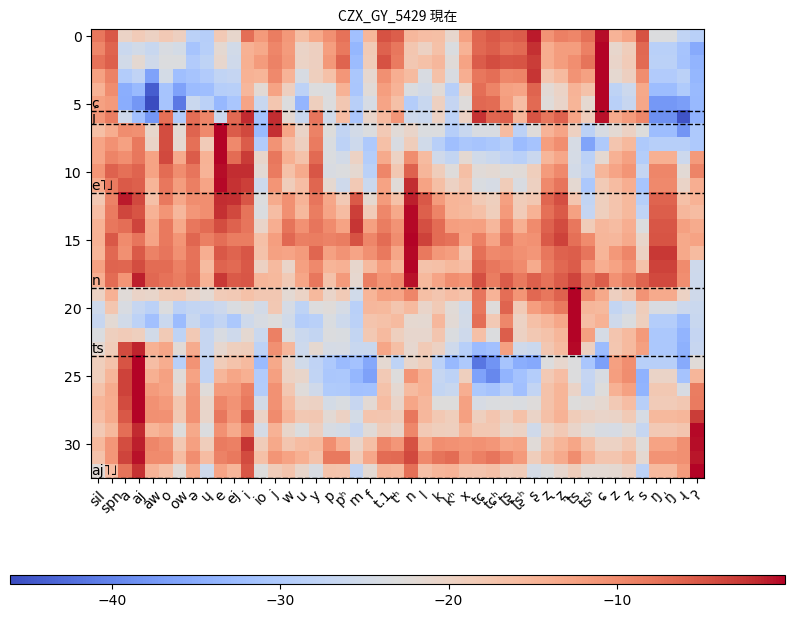

In [5]:
from typing import cast
import matplotlib.pyplot as plt

# utt_id = phones_df.utt_id.unique()[34]
# utt_id = "XSH_GY_0831"  # highly-reduced one
utt_id = "CZX_GY_5429"  # standard one
utt_df = phones_df.loc[phones_df["utt_id"] == utt_id, :]
pmat = utt_df.iloc[:, 4:].values

fig = plt.figure(figsize=(10, 10*(pmat.shape[0]/pmat.shape[1])+1))
plt.imshow(pmat, 
            cmap="coolwarm")

for phone, phone_grp in utt_df.groupby("phone", sort=False):
    t_end = phone_grp.iloc[-1].t
    phone = cast(str, phone)
    plt.text(-0.5, t_end+0.5, phone, va="bottom")
    plt.axhline(t_end+0.5, color="black", 
            linewidth=1, linestyle="dashed")

xticks = range(0, len(phone_table), 1)
xticklabels = [phone_table[y] for y in xticks]
plt.xticks(xticks, xticklabels, rotation=45) 
plt.colorbar(location="bottom", aspect=80)
plt.title(f"{utt_id} {WORD}", fontsize=20, font="Noto Sans CJK JP")
# fig.savefig(str(fig_dir/f"{utt_x.utt_id}_{word_x.label}.png"))


In [6]:
from pathlib import Path
wav_dir = Path(f"~/lago/mfa_data/xianzai/s1/").expanduser()
utt_id = "CZX_GY_5429"
from IPython.display import Audio
Audio(wav_dir/f"{utt_id}.wav", rate=22050)

## Visualize MFCC

In [7]:
feats_df.head()

,utt_id,t,phone,ml_phone,0,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39
0,LJH_GY_1479,0,ɕ,tɕʰ,3.513359,0.742455,0.344213,2.630469,1.110734,-1.174486,...,-0.235308,0.991123,-0.140771,1.080491,-0.454501,0.008692,0.054194,-2.262339,-0.826913,-0.185023
1,LJH_GY_1479,1,ɕ,ɕ,3.732466,0.899552,-0.376300,2.890378,0.992116,-0.750699,...,-0.199419,0.843081,-0.007298,0.046093,-0.736323,0.353967,-0.807512,-2.923517,-0.224086,-2.277481
2,LJH_GY_1479,2,ɕ,tsʰ,3.219908,0.959098,3.778732,2.988152,1.101508,-0.409778,...,0.877638,0.117981,-0.241410,-1.583330,-0.616359,-0.522853,-0.871964,-0.774742,-0.290200,-2.513246
3,LJH_GY_1479,3,ɕ,tɕʰ,2.216850,0.944857,0.888890,3.375685,2.096394,-0.319464,...,0.263929,-1.374962,-0.314451,-1.816569,-0.831781,-1.411102,-1.030128,1.194916,-0.010581,0.042670
4,LJH_GY_1479,4,ɕ,ɕ,1.482104,0.912851,1.224589,3.557863,1.794288,0.298853,...,0.546873,0.112802,-0.347886,-0.321205,-0.520602,-2.074666,0.978598,1.156440,0.560783,-0.554523


In [8]:
from sklearnex.manifold import TSNE
base_feat_idx = feats_df.columns.values.tolist().index("ml_phone")+1
feats_mat = feats_df.iloc[:,base_feat_idx:]
tsne = TSNE()
feats_proj = tsne.fit_transform(feats_mat)


/home/seantyh/miniconda3/envs/mfa/lib/python3.11/site-packages/daal4py/sklearn/manifold/_t_sne.py:361: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn("The PCA initialization in TSNE will change to "


Text(0, 0.5, 'tSNE-2')

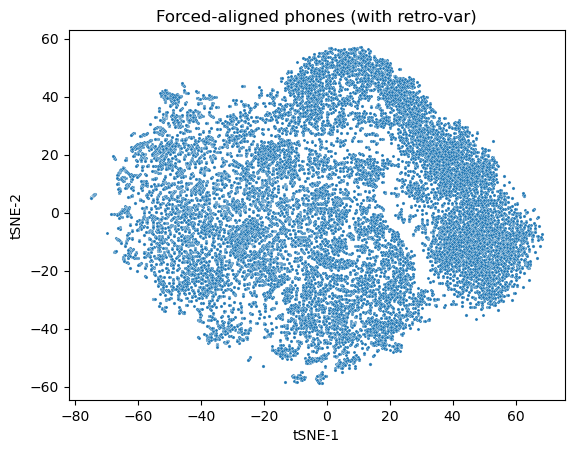

In [9]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0, 0.5, 'tSNE-2')

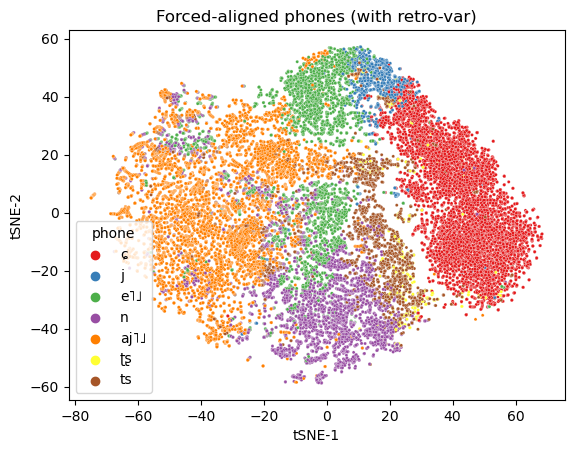

In [10]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], 
                hue=feats_df["phone"], palette="Set1",
                s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0.5, 0.9, 'max-logLik phones (with retro-var)')

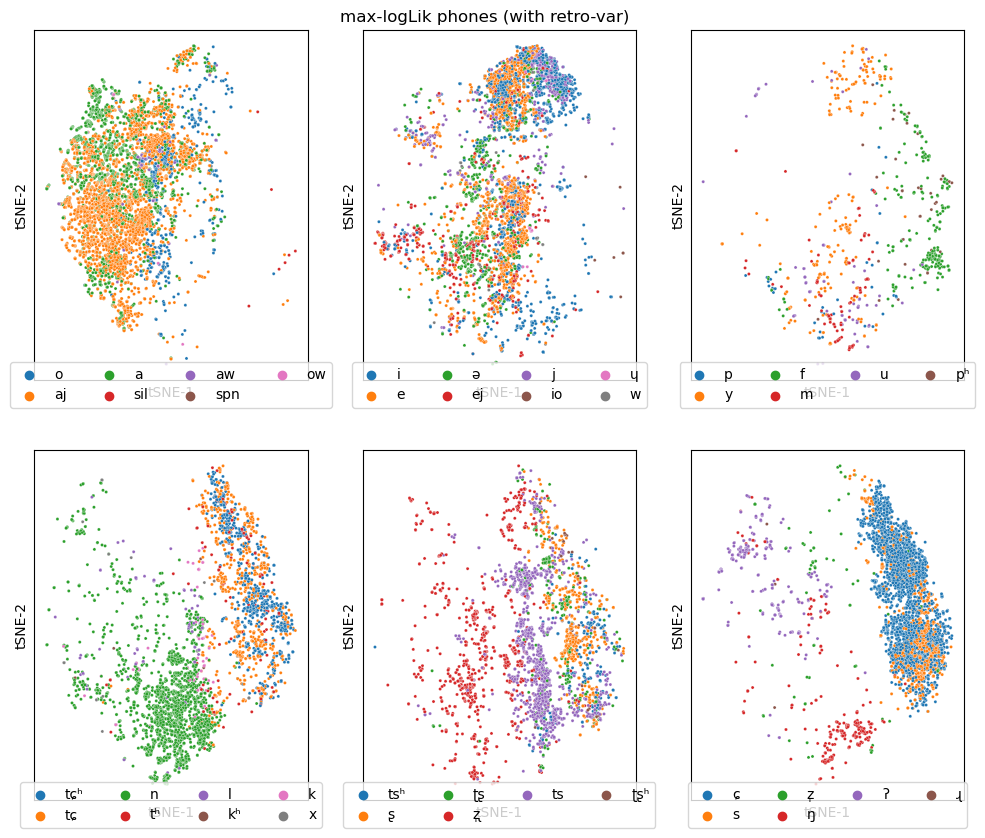

In [11]:
fig = plt.figure(figsize=(12, 10))
for ax_i in range(6):
    plt.subplot(2, 3, ax_i+1)
    sidx = ax_i*len(phone_table)//6
    eidx = (ax_i+1)*len(phone_table)//6
    subset_mask = feats_df["ml_phone"].isin(phone_table[sidx:eidx])
    sns.scatterplot(x=feats_proj[subset_mask,0], y=feats_proj[subset_mask,1], 
                    hue=feats_df["ml_phone"][subset_mask], palette="tab10",
                    s=5)
    plt.xlabel("tSNE-1")
    plt.ylabel("tSNE-2")
    plt.yticks([])
    plt.xticks([])
    plt.gca().legend(loc="lower center", ncols=4, bbox_to_anchor=(0.5, -0.1))
fig.suptitle("max-logLik phones (with retro-var)", y=.9)